In [17]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-27 14:56:40,027: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
from qiskit.tools.visualization import plot_bloch_multivector

In [5]:
%matplotlib inline
import math

In [6]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [25]:
qasm_simulator = Aer.get_backend('qasm_simulator')


In [22]:
statevector_simulator = Aer.get_backend('statevector_simulator')

In [40]:

def run_on_simulator(circuit):
        statevec_job = execute(circuit, backend=statevector_simulator)
        result = statevec_job.result()
        statevec = result.get_statevector()
        num_qubits = circuit.num_qubits #refer to documentation in case of confusion
        circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
        qasm_job = execute(circuit, backend= qasm_simulator, shots=1024)
        #counts = qasm_job.get_counts()
        return statevec

In [41]:
circuit = QuantumCircuit(2,2)
#statevec , counts = run_on_simulator(circuit)

In [43]:
statevec=run_on_simulator(circuit)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


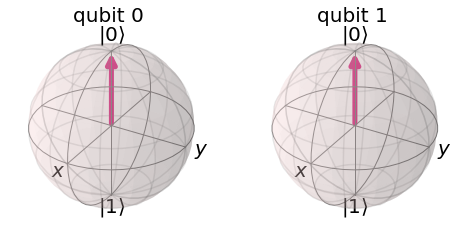

In [44]:
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


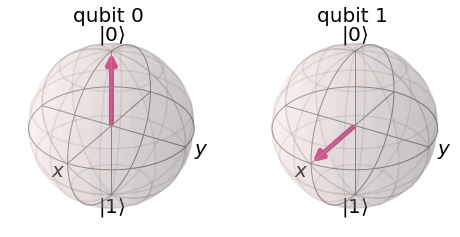

In [47]:
circuit.h(1)
statevec= run_on_simulator(circuit)
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


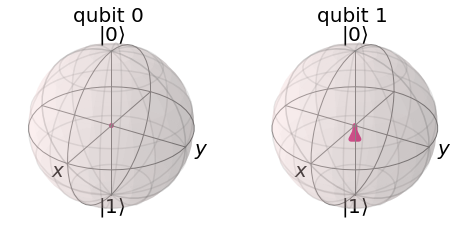

In [49]:
circuit= QuantumCircuit(2,2)

circuit.h(0)
circuit.cx(0,1)
statevec= run_on_simulator(circuit)
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


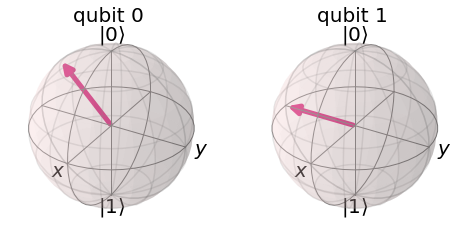

In [50]:
circuit= QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi/2 , 1)
statevec= run_on_simulator(circuit)
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


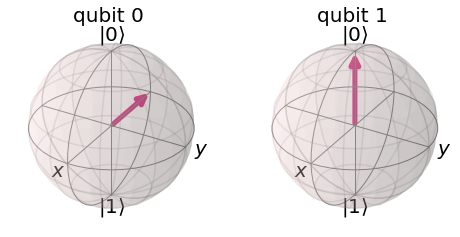

In [51]:
circuit= QuantumCircuit(2,2)
circuit.h(0)
circuit.z(0) #changes the phase
statevec= run_on_simulator(circuit)
plot_bloch_multivector(statevec)